<a href="https://colab.research.google.com/github/59822/Kmeans/blob/main/Clustering_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip uninstall numpy -y
!pip install numpy==1.25.2

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch

<Axes: >

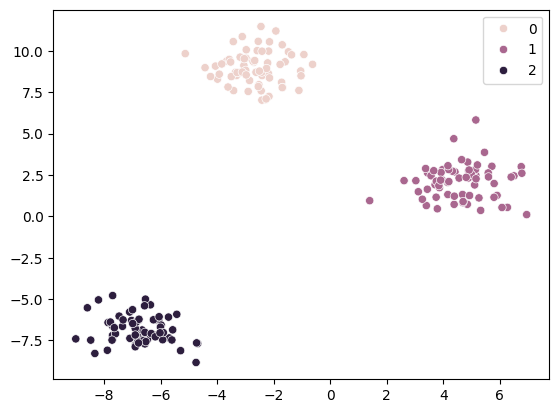

In [8]:
X, y = make_blobs(n_samples= 200, centers= 3, random_state= 42)
sns.scatterplot(x = X[:, 0], y =X[:, 1], hue = y)



In [10]:
# K - means

k_means = KMeans(n_clusters= 3, random_state= 42)
labels_means = k_means.fit_predict(X)

In [12]:
# K - medoid

k_medoids = KMedoids(n_clusters= 3, random_state= 42)
labls_medoids = k_medoids.fit_predict(X)

In [13]:
# DBSCAN

dbscan = DBSCAN(eps= 0.8, min_samples= 5)
# Eps = epsilon
# Min samples = Define los cores

lables_dbs = dbscan.fit_predict(X)

In [14]:
# Hierarchical clustering

hie = AgglomerativeClustering(n_clusters=3)
label_hie = hie.fit_predict(X)

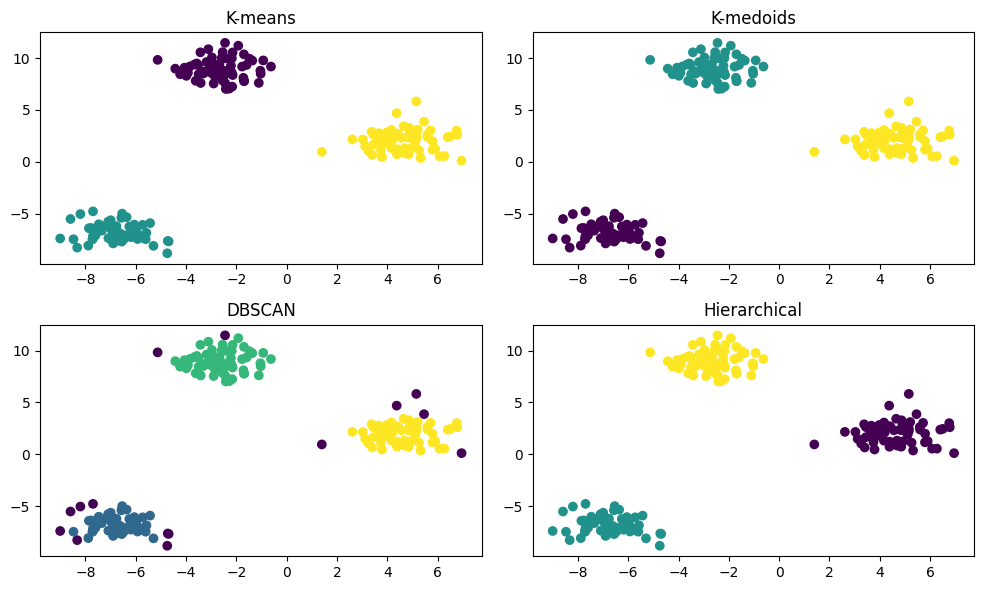

In [15]:
fig, axes = plt.subplots(2,2, figsize = (10,6))

titles = ['K-means', 'K-medoids', 'DBSCAN', 'Hierarchical']
labels = [labels_means, labls_medoids, lables_dbs, label_hie]

# Iterate over axes and plot data
for i, ax in enumerate(axes.flatten()):  # Flatten to iterate over subplots
    ax.scatter(X[:, 0], X[:, 1], c=labels[i])
    ax.set_title(titles[i])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Explicacion:
1. K means: Se define el numero de clusters
2. K medodis : Robusto a outliers
3. DBSCAN : Detecta clusters
4. Hierarchical: Busca relaciones

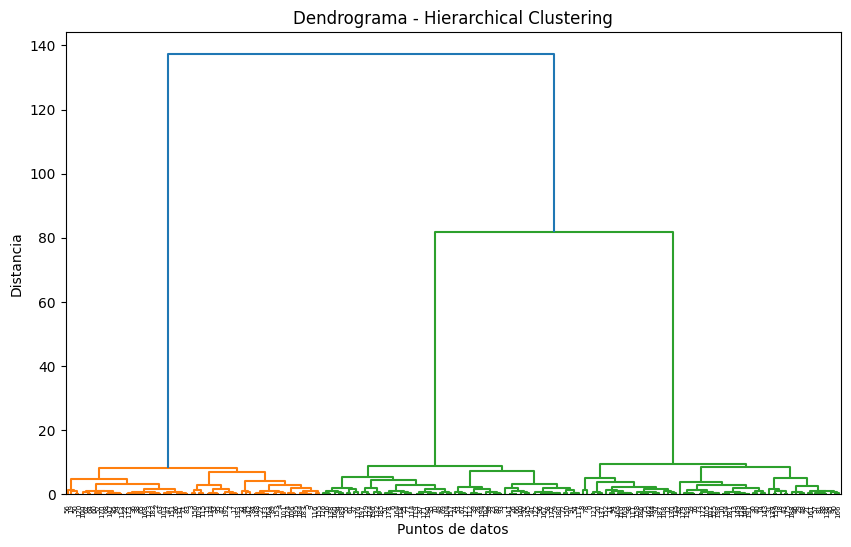

In [17]:
linked = sch.linkage(X, method='ward')

# Dibujamos el dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(linked)
plt.title("Dendrograma - Hierarchical Clustering")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()